In [2]:
import chess_SK_lib as SKlib

from sklearn.neighbors import KNeighborsRegressor
from tqdm import tqdm

In [3]:
X_train, X_test, y_train, y_test = SKlib.load_data_XY_a_to_b()

In [3]:
## Determine best K

K_errs = []

K_range = range(1, 25+1)

for K in tqdm(K_range):
    knn_K = KNeighborsRegressor(n_neighbors = K, weights = 'distance')
    knn_K.fit(X_train, y_train)

    y_pred_k = knn_K.predict(X_test)
    err = np.sum(np.abs(y_pred_k - y_test)) / len(y_test)

    K_errs.append(errs)
    print(f"For k={K}, MAD: {err}")

  0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
K_range = range(1, 25+1)

In [ ]:
K_errs = [2.0444281877493604,
          1.9939948156030234,
          1.9986071010523876,
          2.0326198272852958,
          2.075626335135116,
          2.118005647356715,
          2.160356549182717,
          2.202143830342637,
          2.23940492849805,
          2.275345025896766,
          2.3082815512307358,
          2.3404542188968387,
          2.3699104512475366,
          2.3959139193304506,
          2.4204540427767367,
          2.443773402809489,
          2.4656826813092825,
          2.4859948107555287,
          2.5057035350762695,
          2.5234689705828015,
          2.5406007943605164,
          2.556211395224325,
          2.5710210915795835,
          2.585806532452203,
          2.59913824658427,
]

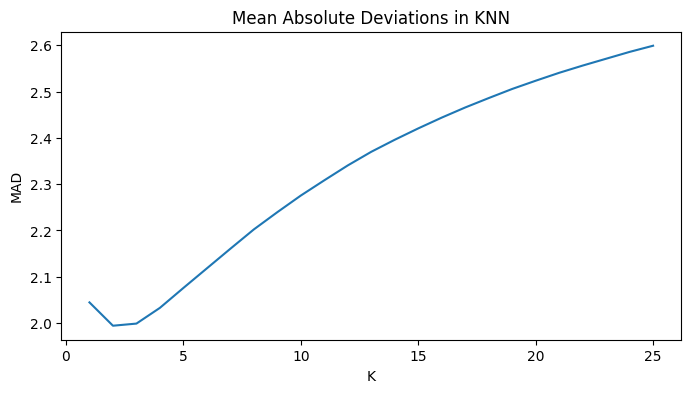

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(K_range, K_errs)
plt.title(f'Mean Absolute Deviations in KNN')
plt.xlabel('K')
plt.ylabel('MAD')
plt.show()

The best value is $K=2$.

In [4]:
knn2 = KNeighborsRegressor(n_neighbors=2)
knn2.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [5]:
y_pred = knn2.predict(X_test)

SKlib.MAD(y_test, y_pred)

In [5]:
MODEL_TYPE = 'KNN'
MODEL_VERSION = SKlib.get_current_version(MODEL_TYPE)

In [8]:
import joblib

file = f'./models_SK/model_{MODEL_TYPE}{2}_{MODEL_VERSION}.joblib'

joblib.dump(knn2, file)

['./joblib/model_KNN2_1.joblib']

In [ ]:
model_loaded = joblib.load(file)

In [ ]:
SKlib.test_game_model(model_loaded)